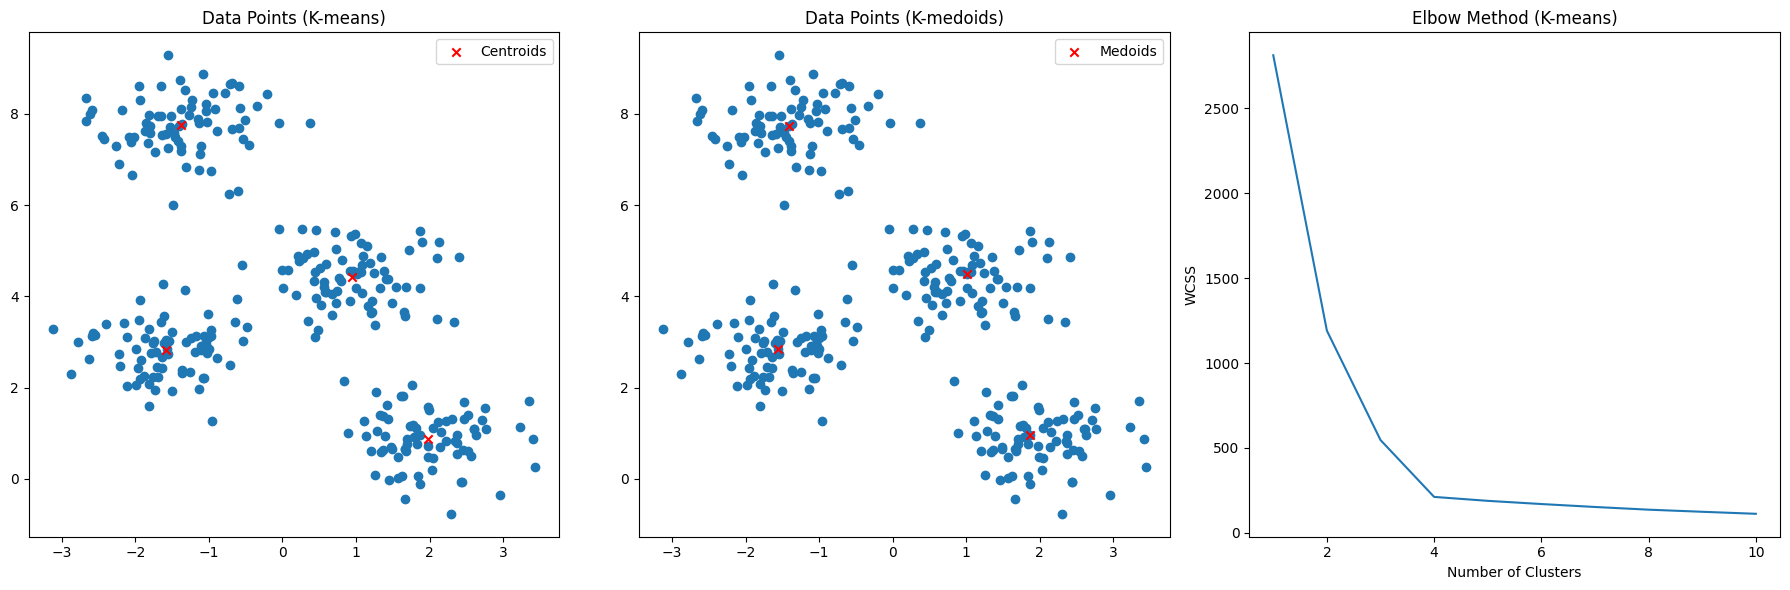

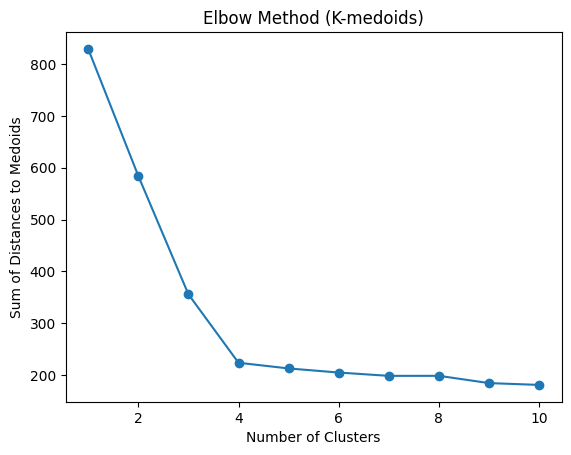

In [11]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
import matplotlib.pyplot as plt
import numpy as np

# Generate random data points
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Scatter plot of data points
plt.figure(figsize=(18, 6))

# K-means clustering
plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1])
plt.title('Data Points (K-means)')

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', label='Centroids')
plt.legend()

# K-medoids clustering
plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1])
plt.title('Data Points (K-medoids)')

kmedoids = KMedoids(n_clusters=4, random_state=0)
kmedoids.fit(X)
plt.scatter(X[kmedoids.medoid_indices_, 0], X[kmedoids.medoid_indices_, 1], marker='x', color='red', label='Medoids')
plt.legend()

# Elbow Method for K-means
plt.subplot(1, 3, 3)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method (K-means)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.tight_layout()
plt.show()


# Elbow Method for K-medoids
distances = []

for k in range(1, 11):
    kmedoids = KMedoids(n_clusters=k, random_state=0)
    kmedoids.fit(X)
    sum_dist = 0
    for i in range(len(X)):
        medoid_idx = kmedoids.medoid_indices_[kmedoids.labels_[i]]
        sum_dist += np.linalg.norm(X[i] - X[medoid_idx])
    distances.append(sum_dist)

# Plotting Elbow Method for K-medoids
plt.plot(range(1, 11), distances, marker='o')
plt.title('Elbow Method (K-medoids)')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Distances to Medoids')
plt.show()



In [8]:
!pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 16.0 MB/s eta 0:00:00
